In [5]:
#Gaussian mass distribution function


import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad
 
π=np.pi
G=4.4911e-42            #in units of M☉^-1 Gpc^3 yr^-2
c=3.07e-10              #in units of Gpc yr^-1
ρ_eq=3.1811e30          #in units of M☉ Gpc^-3 with ρ_eq=2.15368e-16 kg m^-3
t=13.78e9               #in units of yrscorresponding to t_0=13.78Gyr

Δ=0.001
σ_eq=0.005
σ=0.8
m_c=100               #in units of M☉
               

m_1_list=[1e-3,1,50,100,10]    #in units of M☉ & m_1≥ 1e-3M☉ with m_1≡M_1PBH
m_2_list=[1,100,50,1e3,1e5]    #in units of M☉  & m_2≥ 1e-3M☉ with  m_2≡M_2PBH

def m_b(m_1,m_2):
    return(m_1+m_2)           #in units of M☉  & (m_1+m_2)≤ 1e5M☉ with m_b≡M_binary

m_b_list=np.zeros(len(m_1_list))
for k, (m_1,m_2) in enumerate (zip(m_1_list,m_2_list)):
    m_b_list[k]=m_b(m_1,m_2)
   

f=8.5e-5                #10^-4 ≤ f_pbh ≤ 10^-2  &   f_pbh=f/0.85 ie. f=0.85*f_pbh


def P(m):               #Gaussian PBH mass distribution
    return (1/(((2*π)**(1/2))*σ))*math.exp(-(1/2)*((m/(m_c*σ))**2))

def f_i(m):
    return (f*P(m))  

def f_b(m_1,m_2):
    return  (f_i(m_1)+f_i(m_2))

A=(8.0663*(((8*π*ρ_eq)/3)**(4/21))*(((85*(G**3))/(3*(c**5)))**(1/7)))

def B(m_1,m_2,t):      # B is dimensionless
    return (A*((m_1*m_2*(m_b**(-1/3))*t)**(1/7))*((f**2+1.1998*(σ_eq**2))**(-1/2))*((f_b(m_1,m_2)*Δ)**(37/21)))

def D(m_1,m_2,t):
    return (((B(m_1,m_2,t)**(21/37)))/(f_b(m_1,m_2)*Δ))   #f_b=(f_i(m_1)+f_i(m_2))



B_list=np.zeros(len(m_1_list))
D_list=np.zeros(len(m_1_list))

for i,(m_1,m_2,m_b) in enumerate (zip(m_1_list,m_2_list,m_b_list)):
            B_list[i]=B(m_1,m_2,t)
            D_list[i]=D(m_1,m_2,t)

print("B_list=",B_list)            
print("D_list=",D_list)            
            
def integrand(m):
     return (P(m)/m)

I = quad(integrand, 1e-3, 1e5)  # Taking limits of the PBH mass from 1e-3M☉ to 1e5M☉ instead of 
                               # 0 to infinity.
n_T=f*ρ_eq*I[0]         #n_T=f*ρ_eq∫(P(m)/m)*dm 

def x̄(m_1,m_2):
    return (((3*m_b)/(8*π*ρ_eq*f_b(m_1,m_2)*Δ))**(1/3))

def h(m_1,m_2):
    return (((4*π)/3)*(x̄(m_1,m_2)**(3))*n_T)

h_list=np.zeros(len(m_1_list))
for k,(m_1,m_2) in enumerate (zip(m_1_list,m_2_list)):
     h_list[k]= h(m_1,m_2)
        
print("h_list=",h_list)  

B_list= [9.90882456e-14 2.36007091e-13 4.62781232e-13 7.34368858e-14
 3.21606993e-13]
D_list= [0.49103436 1.10244814 1.43159921 1.8095578  1.93070995]
h_list= [2.83733144e+08 3.89258846e+08 3.44918308e+08 1.23941191e+09
 5.71894642e+08]


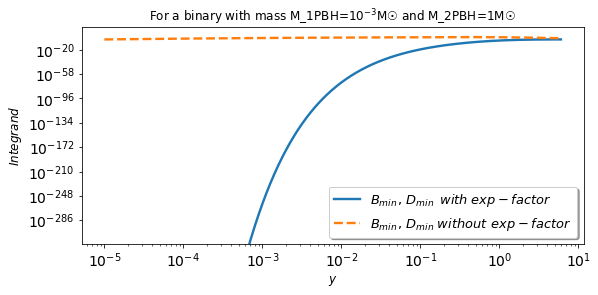

In [6]:
B=B_list[0]
D=D_list[0]
h=h_list[0]

def gamma(Y,D):      #eq.(12) in the notes.
    return ((((1+(0.1709*D*(Y**(-21/37))))**(-1/14))/(1+(0.0136*D*(Y**(-21/37)))))*Y)

def integrand(Y,B,D):        # Integrand of eq.(14) in the notes.
    return ((gamma(Y,D)**2)/(((gamma(Y,D)**2)+1)**(3/2))*(Y**(-58/37))*math.exp(-h*((Y/B)**(-21/37))))

f2 = np.vectorize(integrand)
       

    
def Integrand(Y,D):        #Integrand of eq.(14) without the exponential factor
    return ((gamma(Y,D)**2)/(((gamma(Y,D)**2)+1)**(3/2))*(Y**(-58/37)))



Y=np.linspace(1e-5,6,1000000) 
fig, ax = plt.subplots( sharex=True, figsize=(9,4))


plt.loglog(Y,f2(Y,B,D))
plt.loglog(Y,Integrand(Y,D),'--')




plt.rc('lines', linewidth=2.7)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["$B_{min}\hspace{0.1},\hspace{0.1}D_{min}\hspace{0.5}with \hspace{0.3}exp-factor$ ",
            "$B_{min}\hspace{0.1},\hspace{0.1}D_{min} \hspace{0.3}without \hspace{0.4} exp-factor$"
            ],
           prop = {'size' :13},loc='lower right',shadow = True, facecolor = 'white',fontsize=19)
plt.xlabel('$y$',fontsize=12)
plt.ylabel('$Integrand$',fontsize=12)
plt.title('For a binary with mass M_1PBH=$10^{-3}$M☉ and M_2PBH=1M☉')
plt.show()      

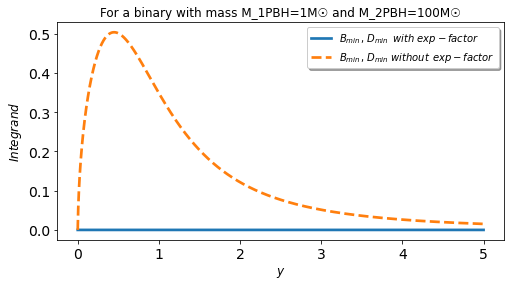

In [7]:
B=B_list[1]
D=D_list[1]
h=h_list[1]


Y=np.linspace(1e-5,5,1000000) 
fig, ax = plt.subplots( sharex=True, figsize=(8,4))

plt.plot(Y,f2(Y,B,D))
plt.plot(Y,Integrand(Y,D),'--')




plt.rc('lines', linewidth=2.4)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["$B_{min}\hspace{0.1},\hspace{0.1}D_{min}\hspace{0.5}with \hspace{0.3}exp-factor$ ",
            "$B_{min}\hspace{0.1},\hspace{0.1}D_{min} \hspace{0.3}without \hspace{0.4} exp-factor$"
            ],
           prop = {'size' :10},loc='upper right',shadow = True, facecolor = 'white',fontsize=19)
plt.xlabel('$y$',fontsize=12)
plt.ylabel('$Integrand$',fontsize=12)
plt.title('For a binary with mass M_1PBH=1M☉ and M_2PBH=100M☉')
plt.show()      

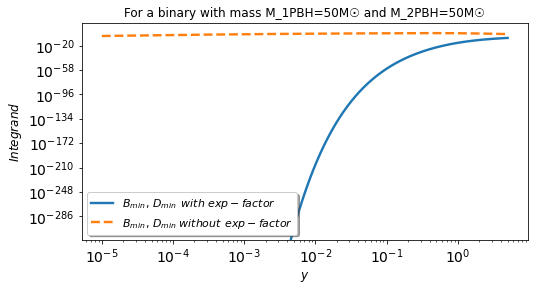

In [8]:
B=B_list[2]
D=D_list[2]
h=h_list[2]


Y=np.linspace(1e-5,5,1000000) 
fig, ax = plt.subplots( sharex=True, figsize=(8,4))

plt.loglog(Y,f2(Y,B,D))
plt.loglog(Y,Integrand(Y,D),'--')




plt.rc('lines', linewidth=2.4)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["$B_{min}\hspace{0.1},\hspace{0.1}D_{min}\hspace{0.5}with \hspace{0.3}exp-factor$ ",
            "$B_{min}\hspace{0.1},\hspace{0.1}D_{min} \hspace{0.3}without \hspace{0.4} exp-factor$"
            ],
           prop = {'size' :11},loc='lower left',shadow = True, facecolor = 'white',fontsize=19)
plt.xlabel('$y$',fontsize=12)
plt.ylabel('$Integrand$',fontsize=12)
plt.title('For a binary with mass M_1PBH=50M☉ and M_2PBH=50M☉')
plt.show()      

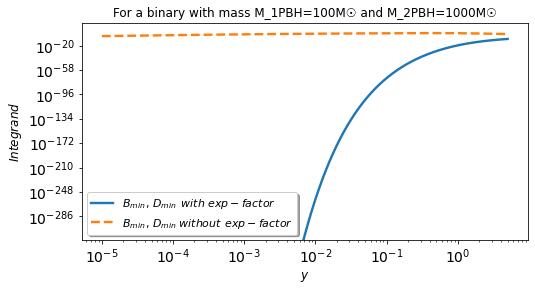

In [11]:
B=B_list[3]
D=D_list[3]
h=h_list[3]


Y=np.linspace(1e-5,5,1000000) 
fig, ax = plt.subplots( sharex=True, figsize=(8,4))

plt.loglog(Y,f2(Y,B,D))
plt.loglog(Y,Integrand(Y,D),'--')




plt.rc('lines', linewidth=2.4)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["$B_{min}\hspace{0.1},\hspace{0.1}D_{min}\hspace{0.5}with \hspace{0.3}exp-factor$ ",
            "$B_{min}\hspace{0.1},\hspace{0.1}D_{min} \hspace{0.3}without \hspace{0.4} exp-factor$"
            ],
           prop = {'size' :11},loc='lower left',shadow = True, facecolor = 'white',fontsize=19)
plt.xlabel('$y$',fontsize=12)
plt.ylabel('$Integrand$',fontsize=12)
plt.title('For a binary with mass M_1PBH=100M☉ and M_2PBH=1000M☉')
plt.show()      

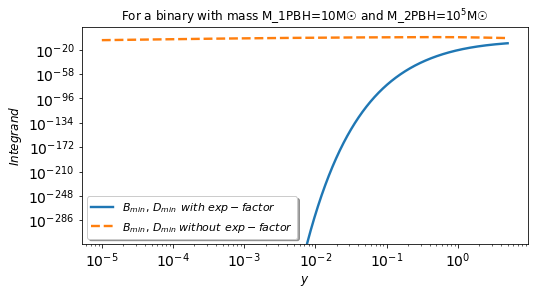

In [13]:
B=B_list[4]
D=D_list[4]
h=h_list[4]


Y=np.linspace(1e-5,5,1000000) 
fig, ax = plt.subplots( sharex=True, figsize=(8,4))

plt.loglog(Y,f2(Y,B,D))
plt.loglog(Y,Integrand(Y,D),'--')




plt.rc('lines', linewidth=2.4)    
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(["$B_{min}\hspace{0.1},\hspace{0.1}D_{min}\hspace{0.5}with \hspace{0.3}exp-factor$ ",
            "$B_{min}\hspace{0.1},\hspace{0.1}D_{min} \hspace{0.3}without \hspace{0.4} exp-factor$"
            ],
           prop = {'size' :11},loc='lower left',shadow = True, facecolor = 'white',fontsize=19)
plt.xlabel('$y$',fontsize=12)
plt.ylabel('$Integrand$',fontsize=12)
plt.title('For a binary with mass M_1PBH=10M☉ and M_2PBH=$10^{5}$M☉')
plt.show()      